## Downloading the Data + PIP Installs

Data is already downloaded and provided in the repository, but it needs to be unzipped.

In [ ]:
import platform
import sys
mysystem = platform.system()

if mysystem != 'Windows':
    !unzip data/hotelReservations.zip

!{sys.executable} -m pip install pandas --user
!{sys.executable} -m pip install numpy --user
!{sys.executable} -m pip install seaborn --user

## Imports 

Here we include import statements and needed libraries to perform this assignment.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## Exploring the Data

#### Dataframe

First, we will explore what is in the entire dataframe provided in the csv through looking at its shape, column descriptions, and total observations.

In [3]:
df = pd.read_csv('./hotel_bookings.csv')
display(df)
print("Dataframe Shape:       ", df.shape)
print("Total Observations:    ", df.shape[0] * df.shape[1])
cols = list(df.columns)
cols_dtype = {}
for i in range(0, len(cols)):
    cols_dtype[cols[i]] = df[cols[i]].dtype
print("Dataframe Column Desc: ", cols_dtype)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Dataframe Shape:        (119390, 32)
Total Observations:     3820480
Dataframe Column Desc:  {'hotel': dtype('O'), 'is_canceled': dtype('int64'), 'lead_time': dtype('int64'), 'arrival_date_year': dtype('int64'), 'arrival_date_month': dtype('O'), 'arrival_date_week_number': dtype('int64'), 'arrival_date_day_of_month': dtype('int64'), 'stays_in_weekend_nights': dtype('int64'), 'stays_in_week_nights': dtype('int64'), 'adults': dtype('int64'), 'children': dtype('float64'), 'babies': dtype('int64'), 'meal': dtype('O'), 'country': dtype('O'), 'market_segment': dtype('O'), 'distribution_channel': dtype('O'), 'is_repeated_guest': dtype('int64'), 'previous_cancellations': dtype('int64'), 'previous_bookings_not_canceled': dtype('int64'), 'reserved_room_type': dtype('O'), 'assigned_room_type': dtype('O'), 'booking_changes': dtype('int64'), 'deposit_type': dtype('O'), 'agent': dtype('float64'), 'company': dtype('float64'), 'days_in_waiting_list': dtype('int64'), 'customer_type': dtype('O'), 'adr':

#### Features

From here, we can also split and transform the data so that we have just the features (X) needed as input for determining a hotel cancellation.

In [4]:
X = df.drop(['is_canceled'], axis=1)
display(X)
print("Feature Shape:        ", X.shape)
print("Total Observations:   ", X.shape[0] * X.shape[1])
cols = list(X.columns)
cols_dtype = {}
for i in range(0, len(cols)):
    cols_dtype[cols[i]] = X[cols[i]].dtype
print("Features Column Desc: ", cols_dtype)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Feature Shape:         (119390, 31)
Total Observations:    3701090
Features Column Desc:  {'hotel': dtype('O'), 'lead_time': dtype('int64'), 'arrival_date_year': dtype('int64'), 'arrival_date_month': dtype('O'), 'arrival_date_week_number': dtype('int64'), 'arrival_date_day_of_month': dtype('int64'), 'stays_in_weekend_nights': dtype('int64'), 'stays_in_week_nights': dtype('int64'), 'adults': dtype('int64'), 'children': dtype('float64'), 'babies': dtype('int64'), 'meal': dtype('O'), 'country': dtype('O'), 'market_segment': dtype('O'), 'distribution_channel': dtype('O'), 'is_repeated_guest': dtype('int64'), 'previous_cancellations': dtype('int64'), 'previous_bookings_not_canceled': dtype('int64'), 'reserved_room_type': dtype('O'), 'assigned_room_type': dtype('O'), 'booking_changes': dtype('int64'), 'deposit_type': dtype('O'), 'agent': dtype('float64'), 'company': dtype('float64'), 'days_in_waiting_list': dtype('int64'), 'customer_type': dtype('O'), 'adr': dtype('float64'), 'required_car_p

#### Class

From here, we can also split and transform the data so that we have all the classes in the data. Specifically, the is_canceled column will be the output of our model (y) so it is the only class.

In [5]:
y = pd.DataFrame(df['is_canceled'])
display(y)
print("Class Shape:        ", y.shape)
print("Total Observations: ", y.shape[0] * y.shape[1])
cols = list(y.columns)
cols_dtype = {}
for i in range(0, len(cols)):
    cols_dtype[cols[i]] = df[cols[i]].dtype
print("Class Column Desc:  ", cols_dtype)

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


Class Shape:         (119390, 1)
Total Observations:  119390
Class Column Desc:   {'is_canceled': dtype('int64')}


#### Missing Data

After exploring the given data, we need to make sure that there is not any missing data from any of the columns.

As a result of this, we noticed that 4 columns were missing data: children, country, agent, and company. Company and Agent were the most extreme of the four missing a significant amount of values.

Note: We used two code blocks so that each column is fully displayed in the notebook to check for any columns missing data. 

In [6]:
cols = list(df.columns)
for i in range(0, int(len(cols) / 2)):
    print("Missing Values (" + cols[i] + "): " + str( df[cols[i]].isna().sum() )) 


Missing Values (hotel): 0
Missing Values (is_canceled): 0
Missing Values (lead_time): 0
Missing Values (arrival_date_year): 0
Missing Values (arrival_date_month): 0
Missing Values (arrival_date_week_number): 0
Missing Values (arrival_date_day_of_month): 0
Missing Values (stays_in_weekend_nights): 0
Missing Values (stays_in_week_nights): 0
Missing Values (adults): 0
Missing Values (children): 4
Missing Values (babies): 0
Missing Values (meal): 0
Missing Values (country): 488
Missing Values (market_segment): 0
Missing Values (distribution_channel): 0


In [7]:
cols = list(df.columns)
for i in range(int(len(cols) / 2), len(cols)):
    print("Missing Values (" + cols[i] + "): " + str( df[cols[i]].isna().sum() ))

Missing Values (is_repeated_guest): 0
Missing Values (previous_cancellations): 0
Missing Values (previous_bookings_not_canceled): 0
Missing Values (reserved_room_type): 0
Missing Values (assigned_room_type): 0
Missing Values (booking_changes): 0
Missing Values (deposit_type): 0
Missing Values (agent): 16340
Missing Values (company): 112593
Missing Values (days_in_waiting_list): 0
Missing Values (customer_type): 0
Missing Values (adr): 0
Missing Values (required_car_parking_spaces): 0
Missing Values (total_of_special_requests): 0
Missing Values (reservation_status): 0
Missing Values (reservation_status_date): 0


#### Data Distribution / Scales

First, lets start with the lead time column's distribution.

Max Value:            737
Min Value:            0
Most Frequent Value:  0


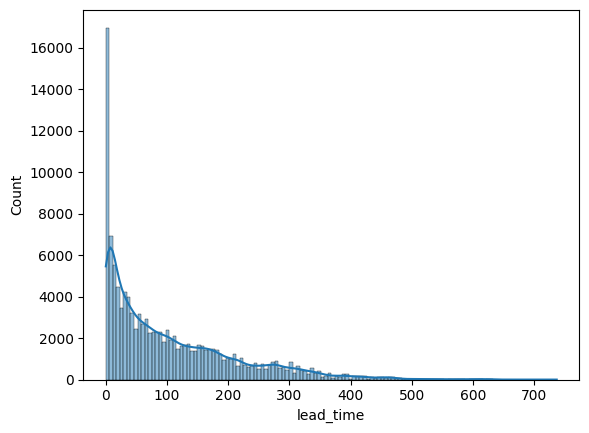

In [8]:
sns.histplot(data=df, x='lead_time', kde=True)
print("Max Value:           ", df['lead_time'].max())
print("Min Value:           ", df['lead_time'].min())
print("Most Frequent Value: ", df['lead_time'].value_counts().idxmax())

Next, we can look at data distribution for booking dates in correlation to time of month, year, week, etc.

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64


<AxesSubplot: xlabel='arrival_date_week_number', ylabel='Count'>

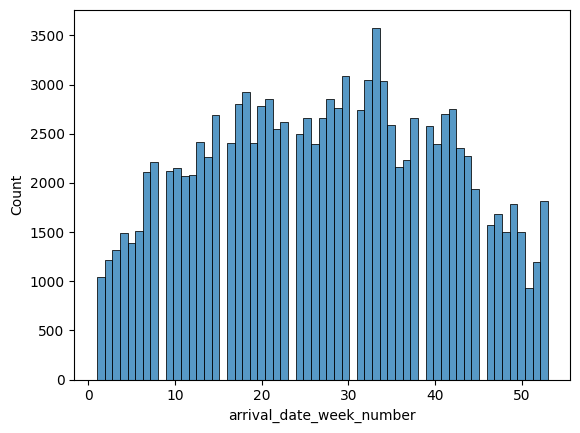

In [9]:
print(df['arrival_date_month'].value_counts())
print(df['arrival_date_year'].value_counts())
sns.histplot(data=df, x='arrival_date_week_number')

<AxesSubplot: xlabel='arrival_date_day_of_month', ylabel='Count'>

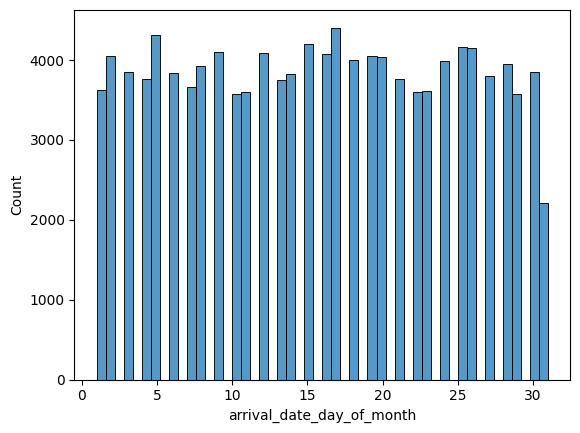

In [10]:
sns.histplot(data=df, x='arrival_date_day_of_month')

Next, we can see the distribution between weekends versus weekdays booked at the hotel.

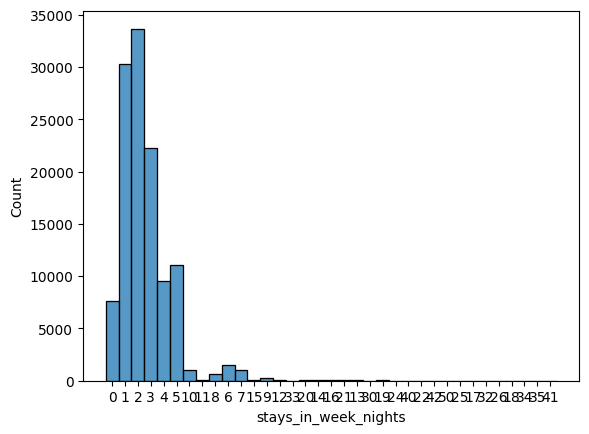

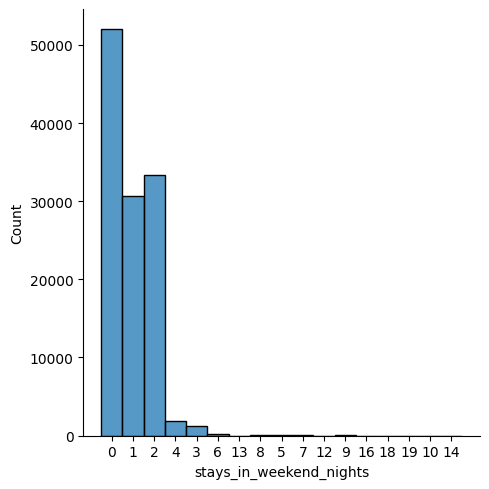

In [33]:
sns.histplot(df['stays_in_week_nights'].astype(str))
sns.displot(df['stays_in_weekend_nights'].astype(str))

Next, we can see the distribution of guests if they are adults, children, and babies.

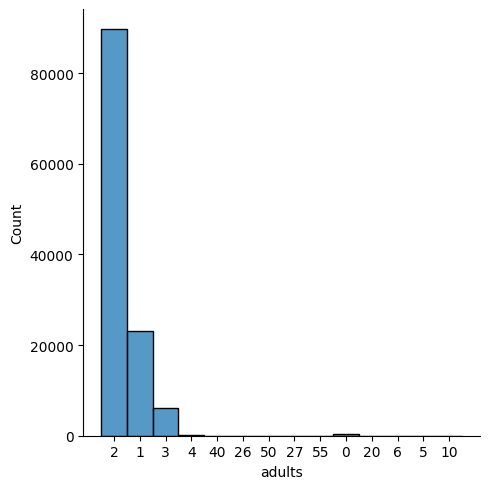

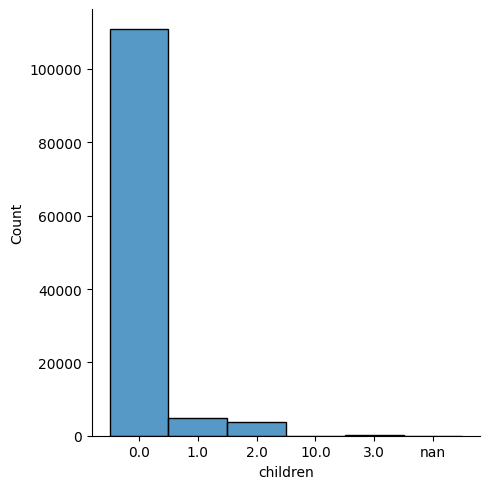

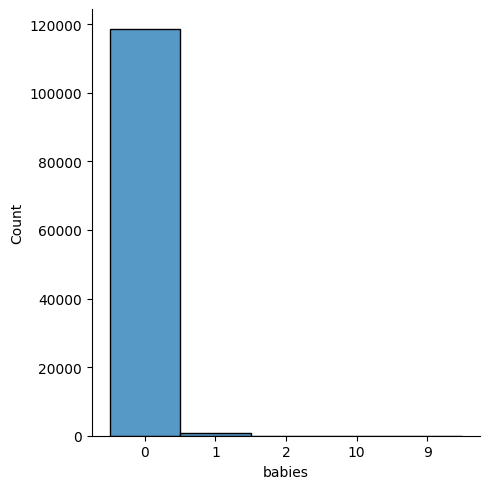

In [38]:
sns.displot(df['adults'].astype(str))
sns.displot(df['children'].astype(str))
sns.displot(df['babies'].astype(str))

Next, we can see the distribution between meals provided by the hotel.

In [39]:
print(df['meal'].value_counts())

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


Next, we can see the distribution of countries where the data is collected from.

In [41]:
print(df['country'].value_counts())

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
CYM        1
DJI        1
UMI        1
SMR        1
BDI        1
Name: country, Length: 177, dtype: int64


Next, we can see the distribution of how the bookings were presented to the customers and where they booked the reservation with via market segment designation and the booking distribution channels.

In [43]:
print("Market Segment:")
print(df['market_segment'].value_counts())
print("\nDistribution Channel:")
print(df['distribution_channel'].value_counts())

Market Segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Distribution Channel:
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


Next, we can see the distribution of the behavior of the customer if they have cancelled reservations in the past or if they are a repeated guest.

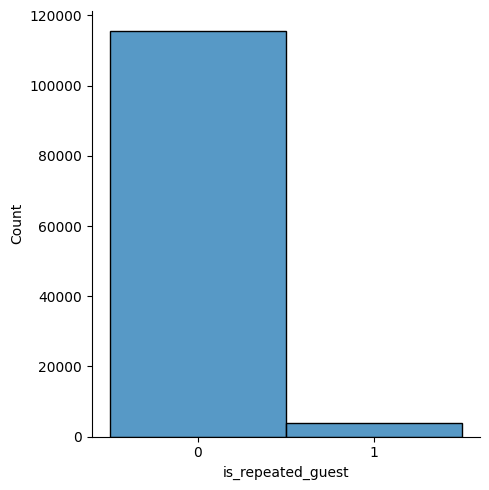

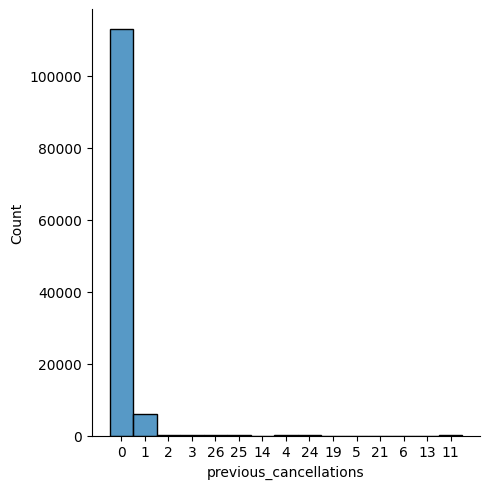

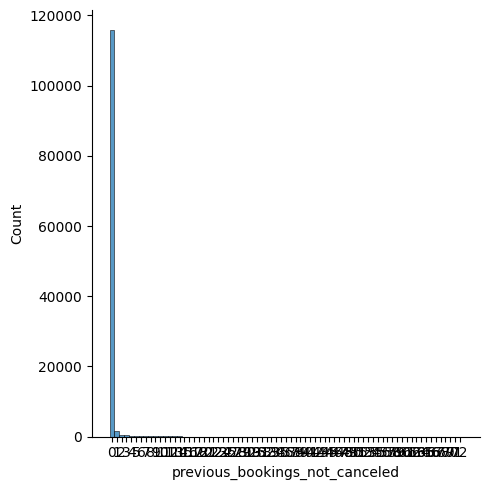

In [49]:
sns.displot(df['is_repeated_guest'].astype(str))
sns.displot(df['previous_cancellations'].astype(str))
sns.displot(df['previous_bookings_not_canceled'].astype(str))

Next, we can see the distribution of the reserved rooms and assigned room types.

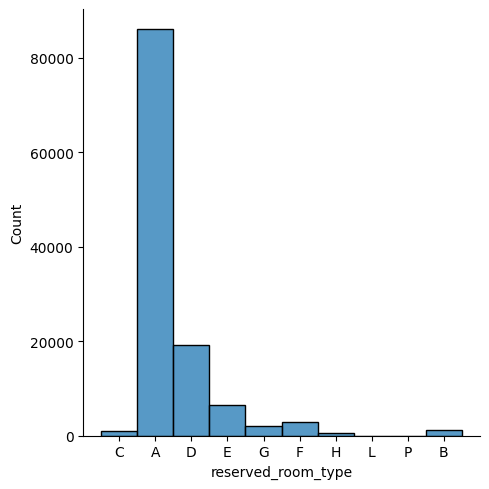

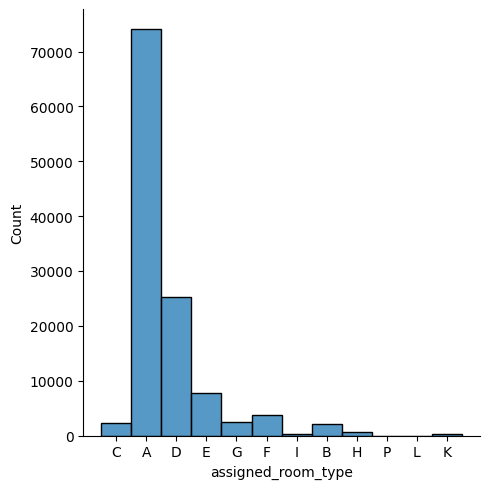

In [11]:
sns.displot(df['reserved_room_type'].astype(str))
sns.displot(df['assigned_room_type'].astype(str))

Next, we can see the distribution of customer booking changes and the deposit type for the booking.

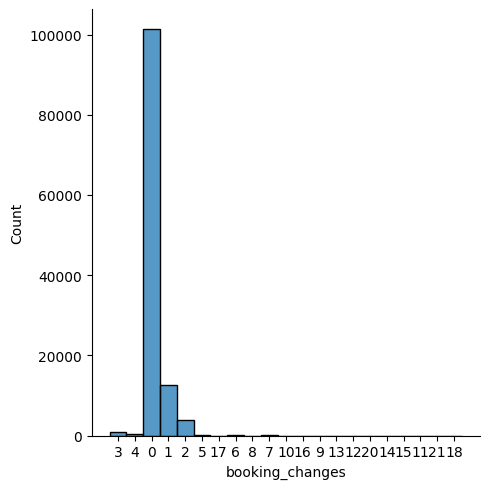

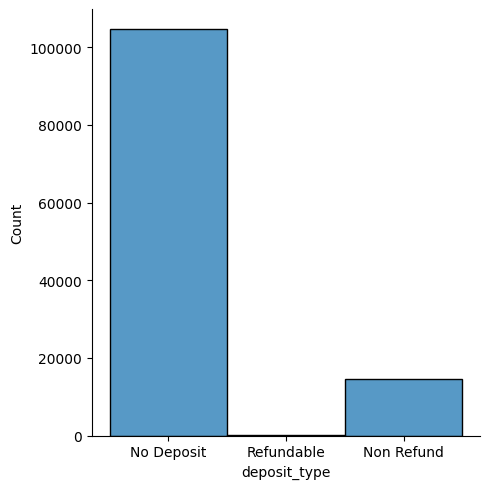

In [12]:
sns.displot(df['booking_changes'].astype(str))
sns.displot(df['deposit_type'].astype(str))

Next, we can see the distribution of travel agency and company IDs that made the booking or was responsible for paying.

<AxesSubplot: xlabel='agent', ylabel='Count'>

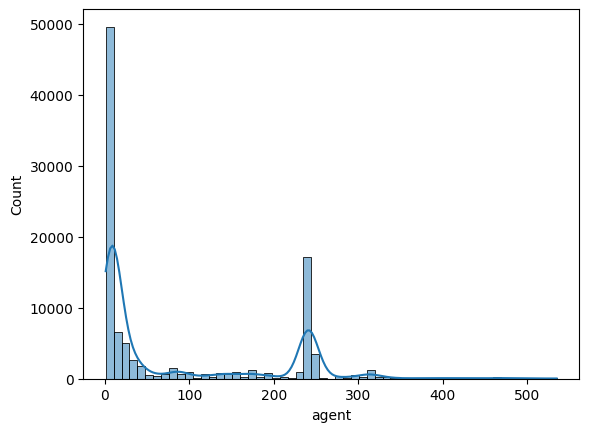

In [16]:
sns.histplot(data=df, x='agent', kde=True)

<AxesSubplot: xlabel='company', ylabel='Count'>

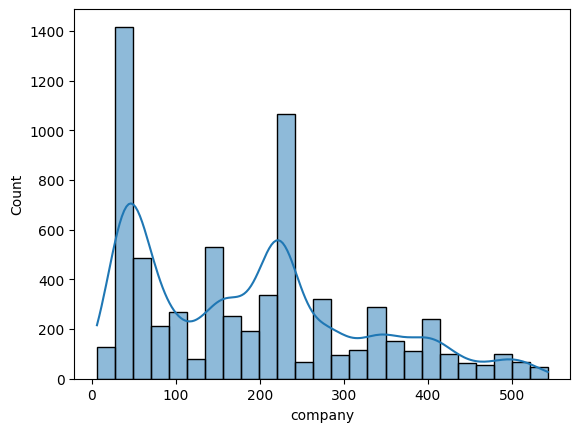

In [17]:
sns.histplot(data=df, x='company', kde=True)

Next, we can see the distribution of days the booking was in the waiting list before it was confirmed.

<AxesSubplot: xlabel='days_in_waiting_list', ylabel='Count'>

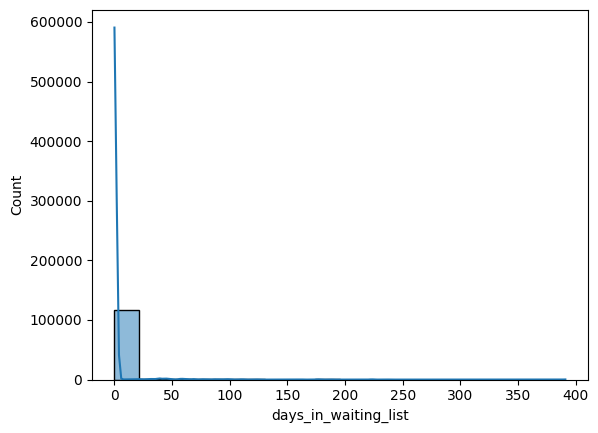

In [18]:
sns.histplot(data=df, x='days_in_waiting_list', kde=True)

Next, we can see the distribution of the customer types: contract, group, transient, or transient-party.

In [20]:
print(df['customer_type'].value_counts())

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64


Next, we can see the distribution of the average daily rate for the booking.

<AxesSubplot: xlabel='adr', ylabel='Count'>

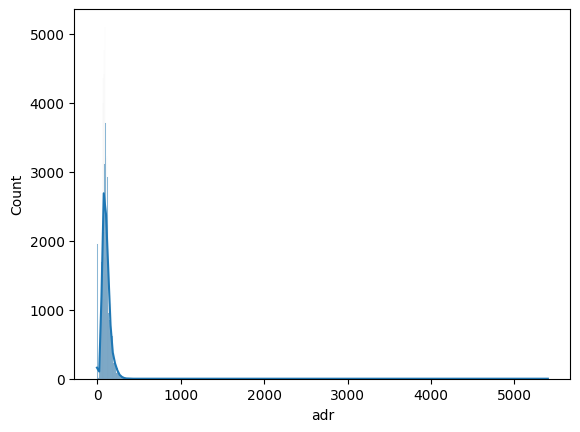

In [19]:
sns.histplot(data=df, x='adr', kde=True)

Next, we can see the distribution of the requests of the customer whether they be parksing spaces or other special requests.

<AxesSubplot: xlabel='required_car_parking_spaces', ylabel='Count'>

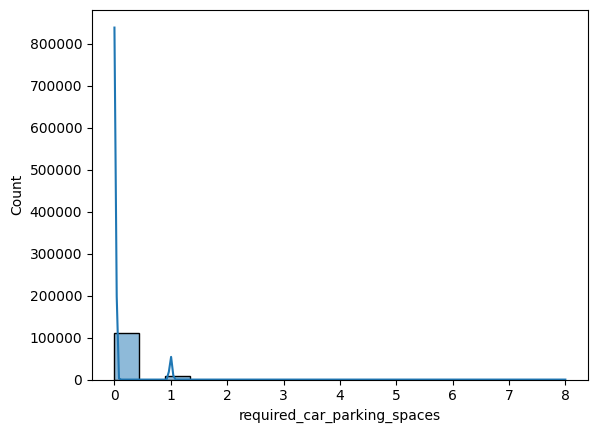

In [21]:
sns.histplot(data=df, x='required_car_parking_spaces', kde=True)

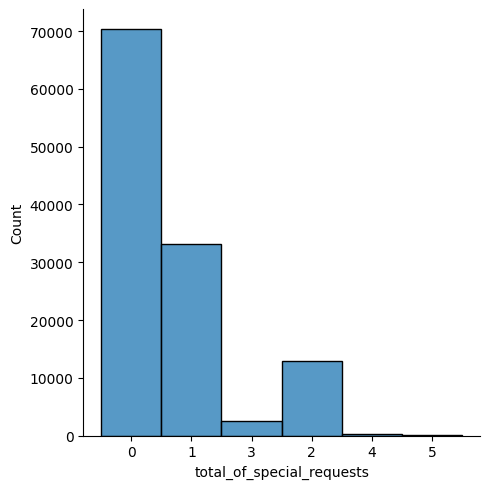

In [26]:
sns.displot(df['total_of_special_requests'].astype(str))

Next, we can see the distribution of the reservation's last status.

In [27]:
print(df['reservation_status'].value_counts())

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


#### Results of Visualizing the Distributions

Over the span of the plots, visuals, and lists of values displaying the data distributions, we can conclude that our data is not scaled or normally distributed between 0 and 1. Thus, as described in the [README.md](README.md), we will need to preprocess all the data accordingly.

#### Plotting the Data

To plot our tabular data, we need to use scatter plots. For each feature, we will plot it against the is_canceled column.

In [56]:
print(list(X.columns))

['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


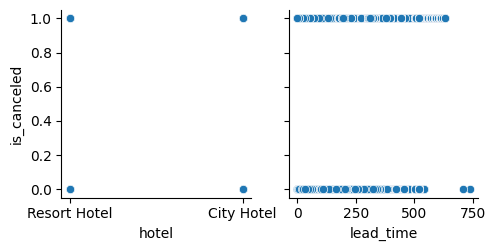

In [67]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['hotel', 'lead_time'])

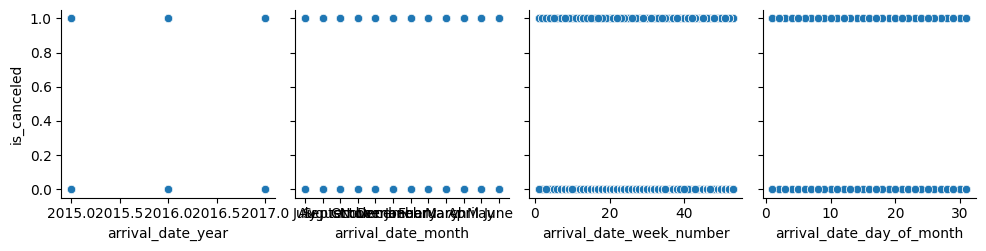

In [57]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'])

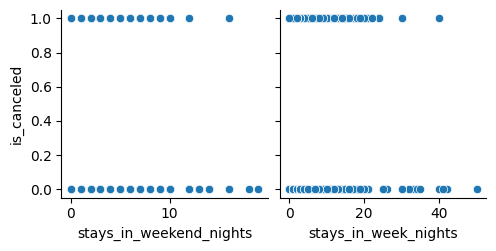

In [58]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['stays_in_weekend_nights', 'stays_in_week_nights'])

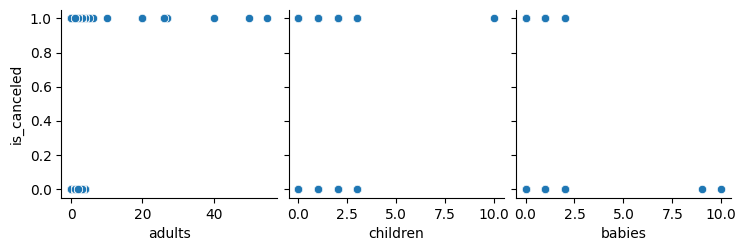

In [59]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['adults', 'children', 'babies'])

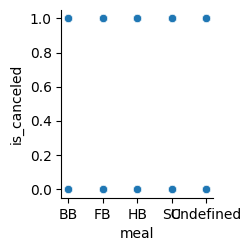

In [63]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['meal'])

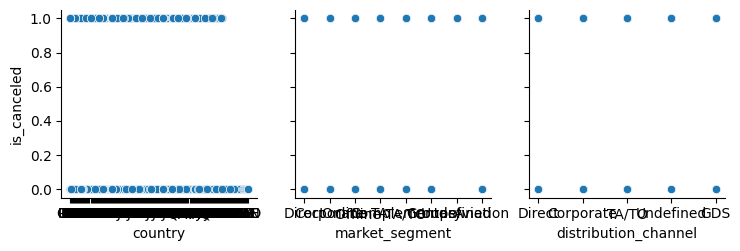

In [62]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['country', 'market_segment', 'distribution_channel'])

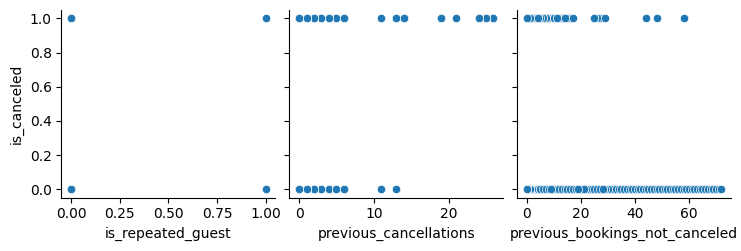

In [66]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled'])

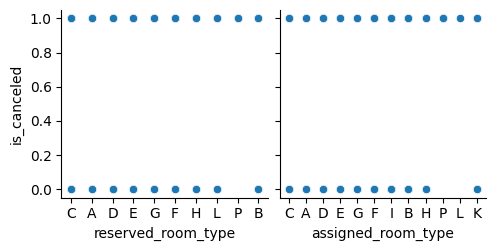

In [68]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['reserved_room_type', 'assigned_room_type'])

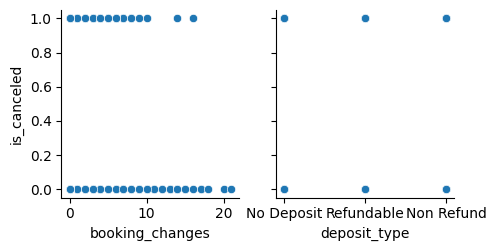

In [69]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['booking_changes', 'deposit_type'])

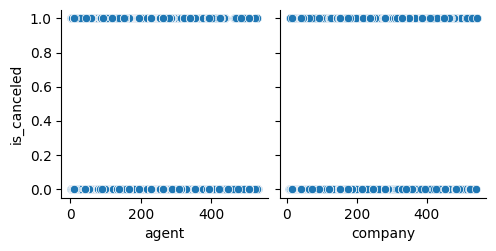

In [70]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['agent', 'company'])

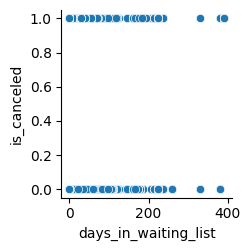

In [71]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['days_in_waiting_list'])

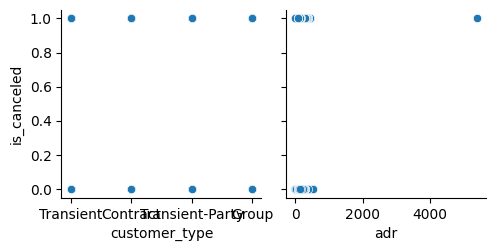

In [72]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['customer_type', 'adr'])

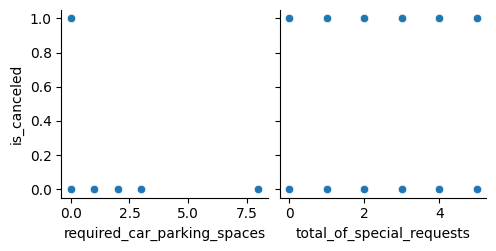

In [73]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['required_car_parking_spaces', 'total_of_special_requests'])

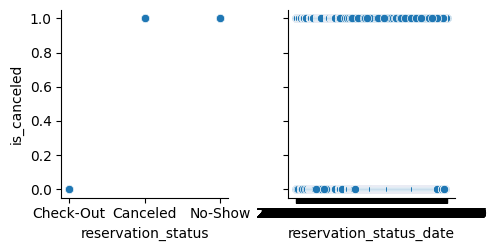

In [74]:
sns.pairplot(data=df, y_vars=['is_canceled'], x_vars=['reservation_status', 'reservation_status_date'])